In [51]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [110]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.regularizers import L1, L2
import numpy as np
import matplotlib.pyplot as plt
import re
print(tf.config.list_physical_devices('GPU'))
# Load the Fashion-MNIST dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# Convert the labels to one-hot encoded vectors
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

# train_x = np.exp(0.01*(train_x.astype('float32') / 255.0-0.5))
# test_x = np.exp(0.01*(test_x.astype('float32') / 255.0-0.5))
train_x = np.abs(train_x.astype('float32') / 255.0-0.5)
test_x = np.abs(test_x.astype('float32') / 255.0-0.5)
# # Define a list of the desired classes
# desired_classes = [0, 6]

# # Create boolean masks to filter the training and test sets
# train_mask = np.isin(train_y.argmax(axis=1), desired_classes)
# test_mask = np.isin(test_y.argmax(axis=1), desired_classes)

# # Apply the masks to the training and test sets
# train_x = train_x[train_mask]
# train_y = train_y[train_mask]
# test_x = test_x[test_mask]
# test_y = test_y[test_mask]



print(train_x.shape)
print(test_x.shape)

[]
(60000, 28, 28)
(10000, 28, 28)


In [111]:
print(train_x[0])

[[0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.4

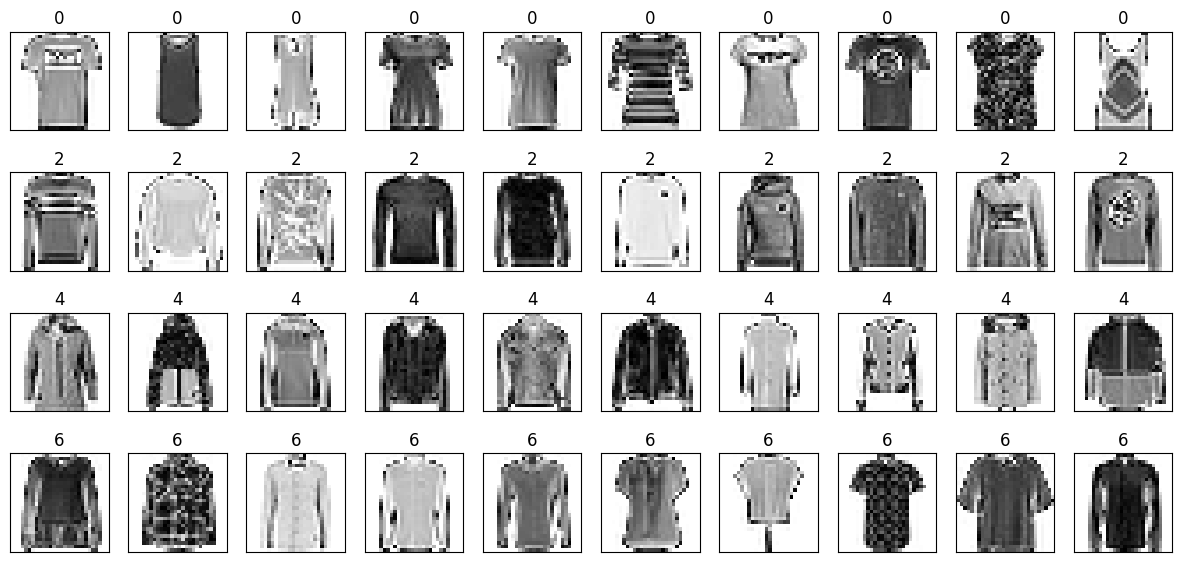

In [112]:
# Get the indices of images from classes 0, 2, 4, and 6
class_indices = [0, 2, 4, 6]
indices = []
for i in class_indices:
    indices += np.where(np.argmax(train_y, axis=1) == i)[0][:10].tolist()

# Select the images and labels
x_sample = train_x[indices]
y_sample = train_y[indices]

# Plot the images
fig, axs = plt.subplots(4, 10, figsize=(15, 7))
for i, (x, y) in enumerate(zip(x_sample, y_sample)):
    row = i // 10
    col = i % 10
    img = x.reshape(28, 28)
    axs[row, col].imshow(img, cmap='gray')
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].set_title(np.argmax(y))


In [116]:
droput = 0.2
alpha = 0.002
# alpha = 0
activ = 'relu'
# activ = 'sigmoid'
# activ = 'tanh'
# activ = 'relu'
# Define the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=L2(alpha)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(droput),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=L2(alpha)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(droput),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=L2(alpha)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(droput),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=L2(alpha)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(droput),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
k = 1
precision = tf.keras.metrics.Precision(top_k=k)
# rmsprop
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[precision])
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, )
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[precision])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[precision])
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[precision])
# rmsprop

# Train the model
history = model.fit(train_x, train_y, epochs=30, batch_size=512, validation_split=0.1)

# Evaluate the model
test_loss, test_precision = model.evaluate(test_x, test_y)

print('Test loss:', test_loss)
print(f'Test precision @ {k}:', test_precision)


Epoch 1/30
106/106 [==============================] - 5s 28ms/step - loss: 2.7240 - precision_24: 0.7273 - val_loss: 3.1537 - val_precision_24: 0.4195
Epoch 2/30
106/106 [==============================] - 3s 26ms/step - loss: 1.8970 - precision_24: 0.8222 - val_loss: 2.9911 - val_precision_24: 0.3432
Epoch 3/30
106/106 [==============================] - 3s 26ms/step - loss: 1.3961 - precision_24: 0.8438 - val_loss: 1.8521 - val_precision_24: 0.6178
Epoch 4/30
106/106 [==============================] - 3s 25ms/step - loss: 1.0556 - precision_24: 0.8545 - val_loss: 1.1177 - val_precision_24: 0.8030
Epoch 5/30
106/106 [==============================] - 3s 25ms/step - loss: 0.8413 - precision_24: 0.8618 - val_loss: 0.8385 - val_precision_24: 0.8430
Epoch 6/30
106/106 [==============================] - 3s 25ms/step - loss: 0.7129 - precision_24: 0.8647 - val_loss: 0.7111 - val_precision_24: 0.8533
Epoch 7/30
106/106 [==============================] - 3s 32ms/step - loss: 0.6242 - precision_

KeyboardInterrupt: 

In [ ]:
history_dict = history.history

prec_key = 'precision'
val_prec_key = 'val_precision'
for key in history_dict.keys():
    if re.search(r'\d+$', key):
        # Extract the number from the string
        number = int(re.findall(r'\d+', key)[-1])
        prec_key += f'_{number}'
        val_prec_key += f'_{number}'
        break

print(prec_key)    
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict[prec_key]) + 1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the training and validation loss in the first subplot
ax1.plot(epochs, loss_values, 'bo', label='Training loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

val_acc_values = history_dict[val_prec_key]

# Plot the training and validation accuracy in the second subplot
ax2.plot(epochs, history_dict[prec_key], 'bo', label='Training prec')
ax2.plot(epochs, val_acc_values, 'b', label='Validation prec')
ax2.set_title('Training and validation precision')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('precision')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
misclassified_indices = []
mismatches = []
y_pred = model.predict(test_x)
for i in range(len(test_y)):
    if np.argmax(test_y[i]) != np.argmax(y_pred[i]):
        misclassified_indices.append(i)
        mismatches.append((np.argmax(test_y[i]),  np.argmax(y_pred[i])))
# print([ (y1.argmax(), y2.argmax()) for y1, y2 in zip(test_y,y_pred)])
# print(dict(mismatches))
# print(mismatches)
pair_frequency = {}
for pair in mismatches:
    if pair in pair_frequency:
        pair_frequency[pair] += 1
    else:
        pair_frequency[pair] = 1

# find the pairs that appear more than others
most_frequent_pairs = []
max_frequency = max(pair_frequency.values())
print(max_frequency)
for pair, frequency in pair_frequency.items():
    if frequency > 40:
        print(f"{pair}: {frequency}")
        most_frequent_pairs.append(pair)
